# classification 

In [1]:
# classifier -> algo that is is used to map the input data to a specific category

In [2]:
# DATASET: SOCIAL_NETWROK.ADS

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
df = pd.read_csv('Social_Network_Ads.csv')

In [6]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


##### separate input and o/p data1

In [7]:
x = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

#### o/p variable analysis

In [10]:
set(y)   #contains unique values

{0, 1}

In [11]:
np.unique(y)

array([0, 1], dtype=int64)

<Axes: xlabel='Purchased', ylabel='count'>

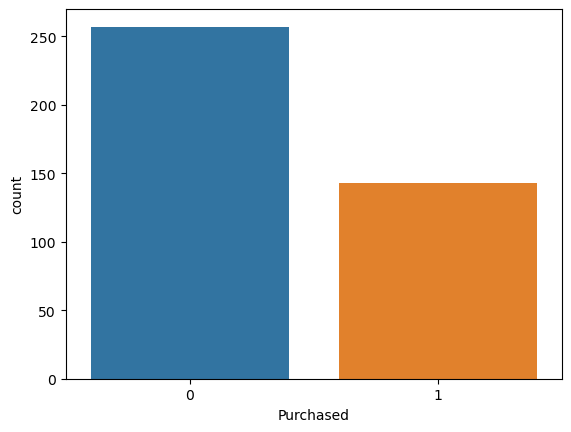

In [12]:
sns.countplot(x = y)

<Axes: xlabel='count', ylabel='Purchased'>

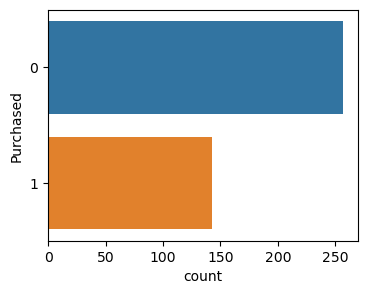

In [15]:
plt.figure(figsize=(4,3))
sns.countplot(y = y)

In [16]:
y.value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [17]:
from collections import Counter
Counter(y)

Counter({0: 257, 1: 143})

In [18]:
y.value_counts()[0]/len(y)*100, y.value_counts()[1]/len(y)*100



(64.25, 35.75)

#### I/P data analysis

In [20]:
x.describe()

,Age,EstimatedSalary
count,400.000000,400.000000
mean,37.655000,69742.500000
std,10.482877,34096.960282
min,18.000000,15000.000000
25%,29.750000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


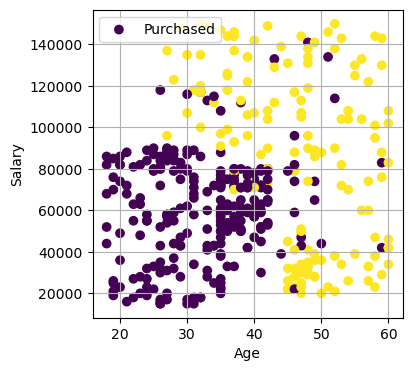

In [28]:
plt.figure(figsize=(4,4))
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid()
plt.scatter(x['Age'], x['EstimatedSalary'], c= y, label = 'Purchased')
plt.legend()

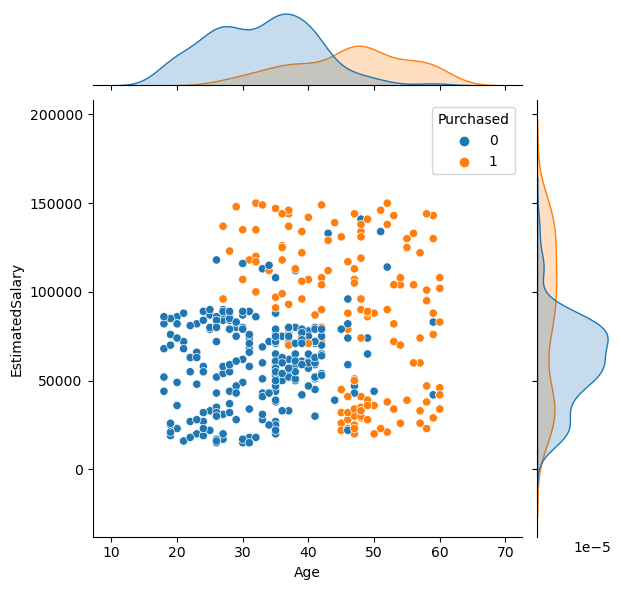

In [25]:
sns.jointplot(x = 'Age', y = 'EstimatedSalary', data = df, hue = 'Purchased')

# NORMALIZATION

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [48]:
pd.DataFrame(x_scaled).describe()

,0,1
count,400.000000,400.000000
mean,0.467976,0.405500
std,0.249592,0.252570
min,0.000000,0.000000
25%,0.279762,0.207407
50%,0.452381,0.407407
75%,0.666667,0.540741
max,1.000000,1.000000


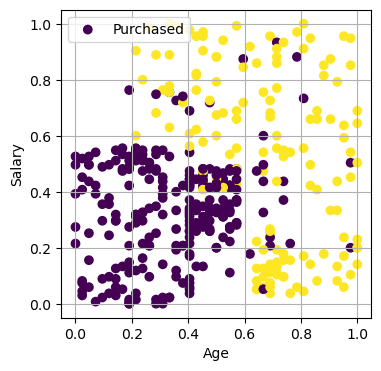

In [50]:
plt.figure(figsize=(4,4))
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid()
plt.scatter(x_scaled[:, 0], x_scaled[:,1], c= y, label = 'Purchased')
plt.legend()

#### CRROSS VALIDATION

In [29]:
from sklearn.model_selection import train_test_splitain_test_split

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y, random_state=0)

In [53]:
x

,Age,EstimatedSalary
0,19.0,19000.0
1,35.0,20000.0
2,26.0,43000.0
3,27.0,57000.0
4,19.0,76000.0
...,...,...
395,46.0,41000.0
396,51.0,23000.0
397,50.0,20000.0
398,36.0,33000.0


In [54]:
x_train.shape

(300, 2)

In [55]:
y_train.shape

(300,)

In [56]:
x_test.shape


(100, 2)

In [57]:
y_test.shape


(100,)

In [58]:
x_train


array([[0.61904762, 0.17777778],
       [0.33333333, 0.77777778],
       [0.47619048, 0.25925926],
       [0.33333333, 0.88888889],
       [0.80952381, 0.04444444],
       [0.83333333, 0.65925926],
       [0.5       , 0.2       ],
       [0.47619048, 0.34074074],
       [0.42857143, 0.25925926],
       [0.42857143, 0.35555556],
       [0.4047619 , 0.07407407],
       [0.4047619 , 0.25925926],
       [0.57142857, 0.42962963],
       [0.69047619, 0.25185185],
       [0.97619048, 0.1037037 ],
       [0.73809524, 0.37037037],
       [0.64285714, 0.85925926],
       [0.30952381, 0.54814815],
       [0.66666667, 0.4962963 ],
       [0.69047619, 0.26666667],
       [0.19047619, 0.        ],
       [1.        , 0.64444444],
       [0.47619048, 0.71851852],
       [0.52380952, 0.68148148],
       [0.57142857, 0.28148148],
       [0.4047619 , 0.32592593],
       [0.71428571, 0.19259259],
       [0.71428571, 0.88148148],
       [0.47619048, 0.72592593],
       [0.26190476, 0.98518519],
       [0.

#### BUILD THE LOGISTIC REGRESSION MODEL

In [59]:
#import the lib
from sklearn.linear_model import LogisticRegression

In [60]:
#create obejct
classifier = LogisticRegression()

In [61]:
# train the algorithm
classifier.fit(x_train, y_train)

LogisticRegression()

#### predict ont the test data


In [62]:
y_pred = classifier.predict(x_test)

In [63]:
y_pred   #predicted result

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [64]:
y_test.values    #actual result

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [65]:
#NORMALIZATION q zaruri h

# without changing the data, we are going to change the data in the same range
# removes the effect of mAgnitute

#### EVALUATE THE PERFORMANCE

In [77]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix

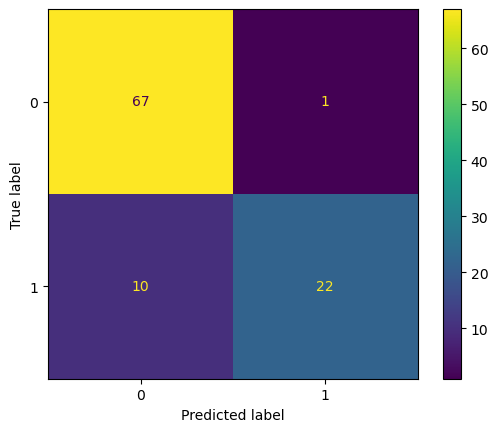

In [78]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [79]:
accuracy_score(y_test, y_pred)

0.89

In [80]:
confusion_matrix(y_test, y_pred)

array([[67,  1],
       [10, 22]], dtype=int64)

In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92        68
           1       0.96      0.69      0.80        32

    accuracy                           0.89       100
   macro avg       0.91      0.84      0.86       100
weighted avg       0.90      0.89      0.88       100



In [85]:
 # recall -> individual class accuracy
#     recall of 0
r0 = 66/67
r0

0.9850746268656716

In [86]:
#     recall of 1

r1 = 22/32
r1

0.6875

In [91]:
#precison - class 0 -postive predicitove value(ppv)

p0 = 67/77
p0

0.8701298701298701

In [92]:
#precison - class 1 - negative predicitove value(npv)

p1 = 22/23
p1

0.9565217391304348

In [93]:
# f1 score --> avg of precison and recall(harmonic mean)
new1 = [[23,  25000]]
new2 =[[48, 123000]]

In [100]:
import warnings
warnings.filterwarnings('ignore')

In [101]:
classifier.predict(scaler.transform(new1))

array([0], dtype=int64)

In [102]:
classifier.predict_proba(scaler.transform(new1))

array([[0.96508964, 0.03491036]])

In [105]:
classifier.predict(scaler.transform(new2))


array([1], dtype=int64)

In [104]:
classifier.predict_proba(scaler.transform(new2))

array([[0.19234625, 0.80765375]])

In [106]:
# DECISiON TREE 